Имполртируем необходимые библиотеки

In [451]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Загружаем датасет

In [452]:
dataset_path=os.path.abspath(os.path.join("..","..","dataset","S02-hw-dataset.csv"))
print (dataset_path)
df = pd.read_csv(dataset_path)

c:\Users\Юля\Desktop\Инжинерия Искусственного интеллекта\Gorbacheva_Julia_III\dataset\S02-hw-dataset.csv


Выводим первые строки датасета

In [453]:
print("Первые 5 строк датасета:")
display(df.head())

Первые 5 строк датасета:


,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


Выводим информацию о столбцах

In [454]:
print("\nИнформация о данных:")
df.info()


Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


Выводим базовые описательные статистики

In [455]:
print("\nОписательные статистики:")
display(df.describe(include='all'))


Описательные статистики:


,user_id,age,country,purchases,revenue
count,41.000000,39.000000,41,41.000000,41.000000
unique,NaN,NaN,5,NaN,NaN
top,NaN,NaN,RU,NaN,NaN
freq,NaN,NaN,13,NaN,NaN
mean,20.243902,36.512821,NaN,4.829268,820.048780
std,11.659289,18.304259,NaN,2.710189,613.127269
min,1.000000,5.000000,NaN,-1.000000,0.000000
25%,10.000000,24.000000,NaN,3.000000,432.000000
50%,20.000000,33.000000,NaN,5.000000,693.000000
75%,30.000000,45.500000,NaN,7.000000,1115.000000


Считаем долю пропусков в каждом столбце

In [456]:
print("Доля пропусков по столбцам:")
missing_data = df.isna().mean()
display(missing_data[missing_data > 0].sort_values(ascending=False))

Доля пропусков по столбцам:


age    0.04878
dtype: float64

Проверяем наличие полностью дублирующих строк

In [457]:
duplicates_count = df.duplicated().sum()
print(f"Количество полностью дублирующих строк: {duplicates_count}")

Количество полностью дублирующих строк: 1


Проверка дубликатов по user_id

In [458]:
if 'user_id' in df.columns:
    user_duplicates = df['user_id'].duplicated().sum()
    print(f"Дубликатов user_id: {user_duplicates}")

Дубликатов user_id: 1


Проверка возраста (age)

In [459]:
suspicious_cases = []
if 'age' in df.columns:
    # Нереалистичный возраст
    invalid_age_high = df[df['age'] > 100]
    invalid_age_low = df[df['age'] < 14]  # минимальный разумный возраст
    
    if not invalid_age_high.empty:
        print("Подозрительные значения возраста (>100):")
        display(invalid_age_high[['user_id', 'age']])
        suspicious_cases.append(f"Возраст >100: {len(invalid_age_high)} случаев")
    
    if not invalid_age_low.empty:
        print("Подозрительные значения возраста (<14):")
        display(invalid_age_low[['user_id', 'age']])
        suspicious_cases.append(f"Возраст <14: {len(invalid_age_low)} случаев")

Подозрительные значения возраста (>100):


,user_id,age
5,6,120.0


Подозрительные значения возраста (<14):


,user_id,age
20,21,5.0


Проверка покупок - отрицательные значения

In [460]:
purchase_col = [col for col in df.columns if 'purch' in col.lower()]
if purchase_col:
    purchase_col = purchase_col[0]  # берем первую подходящую колонку
    negative_purchases = df[df[purchase_col] < 0]
    if not negative_purchases.empty:
        print("Отрицательные значения покупок:")
        display(negative_purchases[['user_id', purchase_col]])
        suspicious_cases.append(f"Отрицательные покупки: {len(negative_purchases)} случаев")

Отрицательные значения покупок:


,user_id,purchases
5,6,-1


Проверка выручки - отрицательные значения

In [461]:
revenue_col = [col for col in df.columns if 'reven' in col.lower()]
if revenue_col:
    revenue_col = revenue_col[0]  # берем первую подходящую колонку
    negative_revenue = df[df[revenue_col] < 0]
    if not negative_revenue.empty:
        print("Отрицательная выручка:")
        display(negative_revenue[['user_id', revenue_col]])
        suspicious_cases.append(f"Отрицательная выручка: {len(negative_revenue)} случаев")

Проверка логической согласованности

In [462]:
if purchase_col and revenue_col:
    # Случай 1: Есть покупки, но нулевая выручка
    zero_revenue_with_purchases = df[(df[purchase_col] > 0) & (df[revenue_col] == 0)]
    if not zero_revenue_with_purchases.empty:
        print("Покупки есть, но выручка = 0:")
        display(zero_revenue_with_purchases[['user_id', purchase_col, revenue_col]])
        suspicious_cases.append(f"Покупки>0 при выручке=0: {len(zero_revenue_with_purchases)} случаев")
    
    # Случай 2: Нет покупок, но есть выручка
    revenue_without_purchases = df[(df[purchase_col] == 0) & (df[revenue_col] > 0)]
    if not revenue_without_purchases.empty:
        print("Покупок нет, но выручка > 0:")
        display(revenue_without_purchases[['user_id', purchase_col, revenue_col]])
        suspicious_cases.append(f"Покупки=0 при выручке>0: {len(revenue_without_purchases)} случаев")

Покупки есть, но выручка = 0:


,user_id,purchases,revenue
10,11,4,0


Проверка пропусков в возрасте

In [463]:
if 'age' in df.columns:
    missing_age = df[df['age'].isna()]
    if not missing_age.empty:
        print("Пропуски в возрасте:")
        display(missing_age[['user_id', 'age']])
        suspicious_cases.append(f"Пропуски возраста: {len(missing_age)} случаев")

Пропуски в возрасте:


,user_id,age
4,5,NaN
12,13,NaN


Проверка стран - нестандартные значения

In [464]:
if 'country' in df.columns:
    valid_countries = ['FR', 'RU', 'DE', 'CN', 'US']  
    invalid_countries = df[~df['country'].isin(valid_countries)]
    if not invalid_countries.empty:
        print("Нестандартные значения стран:")
        display(invalid_countries[['user_id', 'country']])
        suspicious_cases.append(f"Нестандартные страны: {len(invalid_countries)} случаев")

Текстовое описание проблем

In [465]:
print("АНАЛИЗ КАЧЕСТВА ДАННЫХ")

print(f"Обнаружены следующие проблемы:\n"
      f"1. Пропуски данных: {len(missing_data[missing_data > 0])} столбцов содержат пропуски\n"
      f"2. Дубликаты: {duplicates_count} полных дубликатов\n"
      f"3. Аномалии: {len(suspicious_cases)} типов подозрительных значений")

if suspicious_cases:
    print("\nПодробнее об аномалиях:")
    for i, case in enumerate(suspicious_cases, 1):
        print(f"  {i}. {case}")
else:
    print("  Явных аномалий не обнаружено")

print("\nДОПОЛНИТЕЛЬНАЯ СТАТИСТИКА")


if 'age' in df.columns:
    print(f"Распределение возрастов: min={df['age'].min()}, max={df['age'].max()}, mean={df['age'].mean():.1f}")

if purchase_col:
    print(f"Распределение покупок: min={df[purchase_col].min()}, max={df[purchase_col].max()}, mean={df[purchase_col].mean():.1f}")

if revenue_col:
    print(f"Распределение выручки: min={df[revenue_col].min()}, max={df[revenue_col].max()}, mean={df[revenue_col].mean():.1f}")

if 'country' in df.columns:
    print("\nРаспределение по странам:")
    display(df['country'].value_counts())

АНАЛИЗ КАЧЕСТВА ДАННЫХ
Обнаружены следующие проблемы:
1. Пропуски данных: 1 столбцов содержат пропуски
2. Дубликаты: 1 полных дубликатов
3. Аномалии: 5 типов подозрительных значений

Подробнее об аномалиях:
  1. Возраст >100: 1 случаев
  2. Возраст <14: 1 случаев
  3. Отрицательные покупки: 1 случаев
  4. Покупки>0 при выручке=0: 1 случаев
  5. Пропуски возраста: 2 случаев

ДОПОЛНИТЕЛЬНАЯ СТАТИСТИКА
Распределение возрастов: min=5.0, max=120.0, mean=36.5
Распределение покупок: min=-1, max=11, mean=4.8
Распределение выручки: min=0, max=2475, mean=820.0

Распределение по странам:


country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

Считаем частоты для категориальных переменных

In [466]:
country_counts = df['country'].value_counts()
print("Количество пользователей по странам:")
display(country_counts)

Количество пользователей по странам:


country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

Группируем по странам с агрегатами

In [467]:
print("\nГРУППИРОВКА ПО СТРАНАМ С АГРЕГАТАМИ")
#Находим правильные названия колонок
purchase_col = [col for col in df.columns if 'purch' in col.lower()][0]
revenue_col = [col for col in df.columns if 'reven' in col.lower()][0]
#Группировка по странам с различными агрегатами
country_analysis = df.groupby('country').agg({
    'user_id': 'count',
    'age': ['mean', 'median', 'min', 'max'],
    purchase_col: ['mean', 'median', 'sum'],
    revenue_col: ['mean', 'median', 'sum']
}).round(2)
#Переименование колонок для лучшей читаемости
country_analysis.columns = [
    'count_users', 
    'age_mean', 'age_median', 'age_min', 'age_max',
    'purchases_mean', 'purchases_median', 'purchases_total',
    'revenue_mean', 'revenue_median', 'revenue_total'
]
#Выводим результат
print("Анализ по странам:")
display(country_analysis)




ГРУППИРОВКА ПО СТРАНАМ С АГРЕГАТАМИ
Анализ по странам:


,count_users,age_mean,age_median,age_min,age_max,purchases_mean,purchases_median,purchases_total,revenue_mean,revenue_median,revenue_total
country,,,,,,,,,,,
CN,2,24.00,24.0,20.0,28.0,4.50,4.5,9,1054.00,1054.0,2108
DE,6,34.60,35.0,18.0,52.0,6.50,6.0,39,1445.50,1200.0,8673
FR,12,46.25,42.0,22.0,120.0,4.25,6.0,51,675.92,619.5,8111
RU,13,30.08,26.0,5.0,54.0,4.77,6.0,62,790.08,650.0,10271
US,8,36.71,39.0,23.0,51.0,4.62,4.0,37,557.38,537.5,4459


Создание возрастных групп (bins)

In [468]:
print("\nВОЗРАСТНЫЕ ГРУППЫ")
# Создаем возрастные группы
age_bins = [0, 18, 25, 35, 45, 55, 65, 100]
age_labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
# Анализ по возрастным группам (исключаем пропуски)
age_group_analysis = df[df['age_group'].notna()].groupby('age_group').agg({
    'user_id': 'count',
    purchase_col: ['mean', 'sum'],
    revenue_col: ['mean', 'sum'],
    'country': lambda x: x.mode()[0] if not x.mode().empty else 'N/A'
}).round(2)
#Переименование колонок для лучшей читаемости
age_group_analysis.columns = [
    'count_users', 
    'purchases_mean', 'purchases_total',
    'revenue_mean', 'revenue_total',
    'most_common_country'
]
#Вывод результата
print("Анализ по возрастным группам:")
display(age_group_analysis)


ВОЗРАСТНЫЕ ГРУППЫ
Анализ по возрастным группам:


C:\Users\Юля\AppData\Local\Temp\ipykernel_10164\2042630081.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_analysis = df[df['age_group'].notna()].groupby('age_group').agg({


,count_users,purchases_mean,purchases_total,revenue_mean,revenue_total,most_common_country
age_group,,,,,,
<18,1,8.00,8,1488.00,1488,RU
18-25,10,4.70,47,617.10,6171,RU
26-35,10,5.30,53,1009.60,10096,FR
36-45,7,5.00,35,1042.86,7300,US
46-55,8,4.12,33,627.62,5021,FR
56-65,2,4.00,8,417.50,835,FR
65+,0,NaN,0,NaN,0,N/A


Дополнительная группировка: страна + возрастная группа

In [469]:
print("\nАНАЛИЗ: СТРАНА И ВОЗРАСТНАЯ ГРУППА")
cross_analysis = df[df['age_group'].notna()].groupby(['country', 'age_group']).agg({
    'user_id': 'count',
    purchase_col: 'mean',
    revenue_col: 'mean'
}).round(2)

print("Анализ по странам и возрастным группам:")
display(cross_analysis)



АНАЛИЗ: СТРАНА И ВОЗРАСТНАЯ ГРУППА
Анализ по странам и возрастным группам:


C:\Users\Юля\AppData\Local\Temp\ipykernel_10164\3271455083.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cross_analysis = df[df['age_group'].notna()].groupby(['country', 'age_group']).agg({


user_id  purchases  revenue
country age_group                             
CN      <18              0        NaN      NaN
        18-25            1       7.00  1652.00
        26-35            1       2.00   456.00
        36-45            0        NaN      NaN
        46-55            0        NaN      NaN
        56-65            0        NaN      NaN
        65+              0        NaN      NaN
DE      <18              0        NaN      NaN
        18-25            1       4.00  1104.00
        26-35            1      11.00  2475.00
        36-45            2       6.00  1548.00
        46-55            1       6.00   702.00
        56-65            0        NaN      NaN
        65+              0        NaN      NaN
FR      <18              0        NaN      NaN
        18-25            1       3.00   183.00
        26-35            4       4.75   725.75
        36-45            1       7.00  1162.00
        46-55            3       5.00   747.67
        56-65            2       4.00   417.50
        65+              0        NaN      NaN
RU      <18              1       8.00  1488.00
        18-25            5       4.80   557.40
        26-35            4       5.25  1065.50
        36-45            0        NaN      NaN
        46-55            3       3.00   578.00
        56-65            0        NaN      NaN
        65+              0        NaN      NaN
US      <18              0        NaN      NaN
        18-25            2       4.50   222.50
        26-35            0        NaN      NaN
        36-45            4       4.00   760.50
        46-55            1       3.00   342.00
        56-65            0        NaN      NaN
        65+              0        NaN      NaN

Текстовый анализ наблюдений

In [470]:
print("ОСНОВНЫЕ НАБЛЮДЕНИЯ И ВЫВОДЫ")
observations = []
# Анализ распределения по странам
dominant_country = country_counts.index[0]
dominant_country_percentage = (country_counts.iloc[0] / country_counts.sum() * 100).round(1)
observations.append(f"• Доминирующая страна: {dominant_country} ({dominant_country_percentage}% пользователей)")
# Анализ возрастного распределения
if 'age' in df.columns and df['age'].notna().any():
    avg_age = df['age'].mean()
    observations.append(f"• Средний возраст пользователей: {avg_age:.1f} лет")
    # Находим самую многочисленную возрастную группу
    largest_age_group = df['age_group'].value_counts().index[0]
    observations.append(f"• Наибольшая возрастная группа: {largest_age_group}")
# Анализ покупок и выручки
max_avg_revenue_country = country_analysis['revenue_mean'].idxmax()
max_avg_revenue = country_analysis['revenue_mean'].max()
observations.append(f"• Наибольшая средняя выручка в {max_avg_revenue_country}: {max_avg_revenue:.2f}")
max_avg_purchases_country = country_analysis['purchases_mean'].idxmax()
max_avg_purchases = country_analysis['purchases_mean'].max()
observations.append(f"• Наибольшее среднее количество покупок в {max_avg_purchases_country}: {max_avg_purchases:.2f}")
# Поиск неожиданных эффектов
if 'age_group' in df.columns:
    # Какая возрастная группа приносит наибольшую выручку?
    highest_revenue_age_group = age_group_analysis['revenue_mean'].idxmax()
    highest_revenue_value = age_group_analysis['revenue_mean'].max()
    observations.append(f"• Наибольшая средняя выручка в возрастной группе {highest_revenue_age_group}: {highest_revenue_value:.2f}")
# Вывод всех наблюдений
print("Ключевые наблюдения:")
for observation in observations:
    print(observation)

ОСНОВНЫЕ НАБЛЮДЕНИЯ И ВЫВОДЫ
Ключевые наблюдения:
• Доминирующая страна: RU (31.7% пользователей)
• Средний возраст пользователей: 36.5 лет
• Наибольшая возрастная группа: 18-25
• Наибольшая средняя выручка в DE: 1445.50
• Наибольшее среднее количество покупок в DE: 6.50
• Наибольшая средняя выручка в возрастной группе <18: 1488.00


Создаем папку для сохранения графиков и получаем названия колонок

In [471]:
figures_dir = 'figures/'
os.makedirs(figures_dir, exist_ok=True)
purchase_col = [col for col in df.columns if 'purch' in col.lower()][0]
revenue_col = [col for col in df.columns if 'reven' in col.lower()][0]


ГИСТОГРАММА для количественного признака (возраст)


ГИСТОГРАММА РАСПРЕДЕЛЕНИЯ ВОЗРАСТА ПОЛЬЗОВАТЕЛЕЙ


<Figure size 1200x600 with 0 Axes>

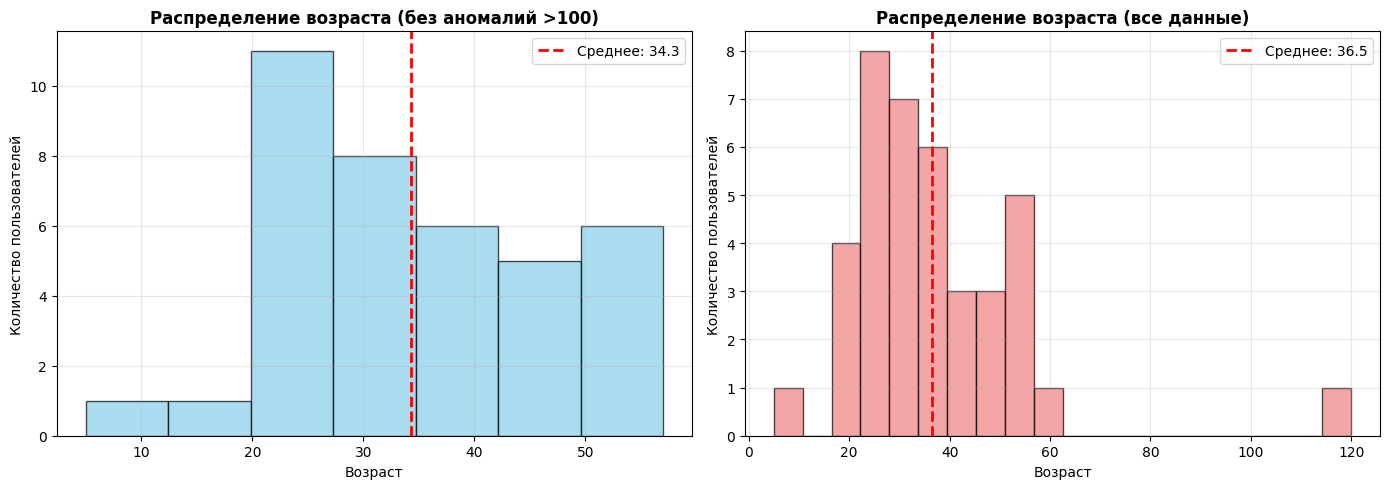

Что показано: Распределение возраста пользователей
Выводы: Большинство пользователей в возрасте 20-40 лет, есть аномалия (120 лет)
Число корзин (без аномалий): 7 (правило Стёрджеса)
Файл сохранен: figures/age_histograms.png


In [472]:
print("\nГИСТОГРАММА РАСПРЕДЕЛЕНИЯ ВОЗРАСТА ПОЛЬЗОВАТЕЛЕЙ")
plt.figure(figsize=(12, 6))
# Создаем подграфики: с аномалиями и без
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
# Гистограмма с фильтрацией аномалий (убираем возраст >100)
clean_age = df[df['age'] <= 100]['age'].dropna()
# Автоматический расчет количества корзин по правилу Стёрджеса
bins_sturges = int(np.ceil(np.log2(len(clean_age)) + 1))
# Гистограмма 1: с фильтрацией аномалий
axes[0].hist(clean_age, bins=bins_sturges, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Распределение возраста (без аномалий >100)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Возраст', fontsize=10)
axes[0].set_ylabel('Количество пользователей', fontsize=10)
axes[0].grid(True, alpha=0.3)
axes[0].axvline(clean_age.mean(), color='red', linestyle='--', linewidth=2, 
                label=f'Среднее: {clean_age.mean():.1f}')
axes[0].legend()
# Гистограмма 2: все данные
axes[1].hist(df['age'].dropna(), bins=20, color='lightcoral', edgecolor='black', alpha=0.7)
axes[1].set_title('Распределение возраста (все данные)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Возраст', fontsize=10)
axes[1].set_ylabel('Количество пользователей', fontsize=10)
axes[1].grid(True, alpha=0.3)
axes[1].axvline(df['age'].mean(), color='red', linestyle='--', linewidth=2, 
                label=f'Среднее: {df["age"].mean():.1f}')
axes[1].legend()
plt.tight_layout()
plt.savefig(f'{figures_dir}age_histograms.png', dpi=300, bbox_inches='tight')
plt.show()
print("Что показано: Распределение возраста пользователей")
print("Выводы: Большинство пользователей в возрасте 20-40 лет, есть аномалия (120 лет)")
print(f"Число корзин (без аномалий): {bins_sturges} (правило Стёрджеса)")
print(f"Файл сохранен: {figures_dir}age_histograms.png")


БОКСПЛОТ для количественного признака

ДИАГРАММА РАССЕЯНИЯ: ПОКУПКИ vs ВЫРУЧКА


C:\Users\Юля\AppData\Local\Temp\ipykernel_10164\2425657301.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data_by_country, vert=True, patch_artist=True, labels=countries,


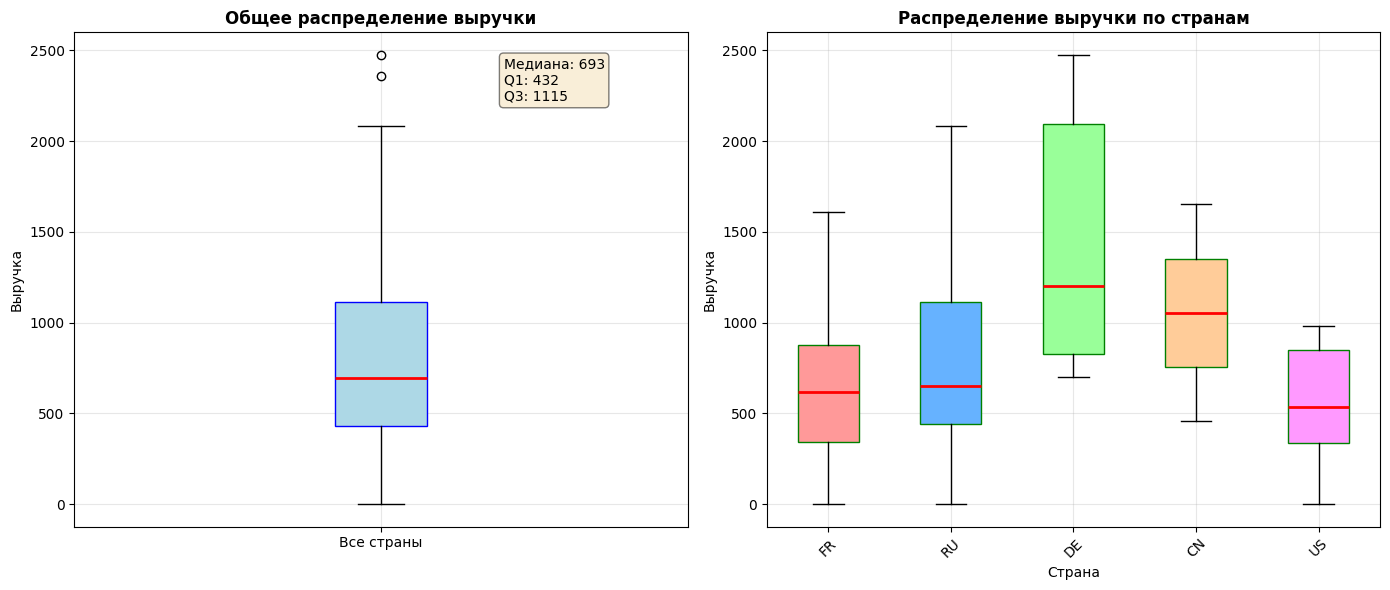

Что показано: Распределение выручки (общее и по странам)
Выводы: Видны различия в медиане и размахе выручки между странами, есть выбросы
Файл сохранен: figures/revenue_boxplots.png


In [473]:
print("ДИАГРАММА РАССЕЯНИЯ: ПОКУПКИ vs ВЫРУЧКА")
plt.figure(figsize=(14, 6))
# Боксплот 1: Общий для выручки
plt.subplot(1, 2, 1)
box_data = df[revenue_col].dropna()
plt.boxplot(box_data, vert=True, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red', linewidth=2))
plt.title('Общее распределение выручки', fontsize=12, fontweight='bold')
plt.ylabel('Выручка', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks([1], ['Все страны'])
# Добавляем статистики
stats_text = f'Медиана: {box_data.median():.0f}\nQ1: {box_data.quantile(0.25):.0f}\nQ3: {box_data.quantile(0.75):.0f}'
plt.text(0.7, 0.95, stats_text, transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
# Боксплот 2: Выручка по странам
plt.subplot(1, 2, 2)
countries = df['country'].unique()
data_by_country = [df[df['country'] == country][revenue_col].dropna().values for country in countries]
box = plt.boxplot(data_by_country, vert=True, patch_artist=True, labels=countries,
                  boxprops=dict(facecolor='lightgreen', color='green'),
                  medianprops=dict(color='red', linewidth=2),
                  flierprops=dict(marker='o', color='red', alpha=0.5))
# Раскрашиваем боксы разными цветами
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99FF']
for patch, color in zip(box['boxes'], colors[:len(countries)]):
    patch.set_facecolor(color)
plt.title('Распределение выручки по странам', fontsize=12, fontweight='bold')
plt.xlabel('Страна', fontsize=10)
plt.ylabel('Выручка', fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'{figures_dir}revenue_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()
print("Что показано: Распределение выручки (общее и по странам)")
print("Выводы: Видны различия в медиане и размахе выручки между странами, есть выбросы")
print(f"Файл сохранен: {figures_dir}revenue_boxplots.png")


SCATTER PLOT для пары количественных признаков

3. ДИАГРАММА РАССЕЯНИЯ: ПОКУПКИ vs ВЫРУЧКА


C:\Users\Юля\AppData\Local\Temp\ipykernel_10164\2810374551.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10')


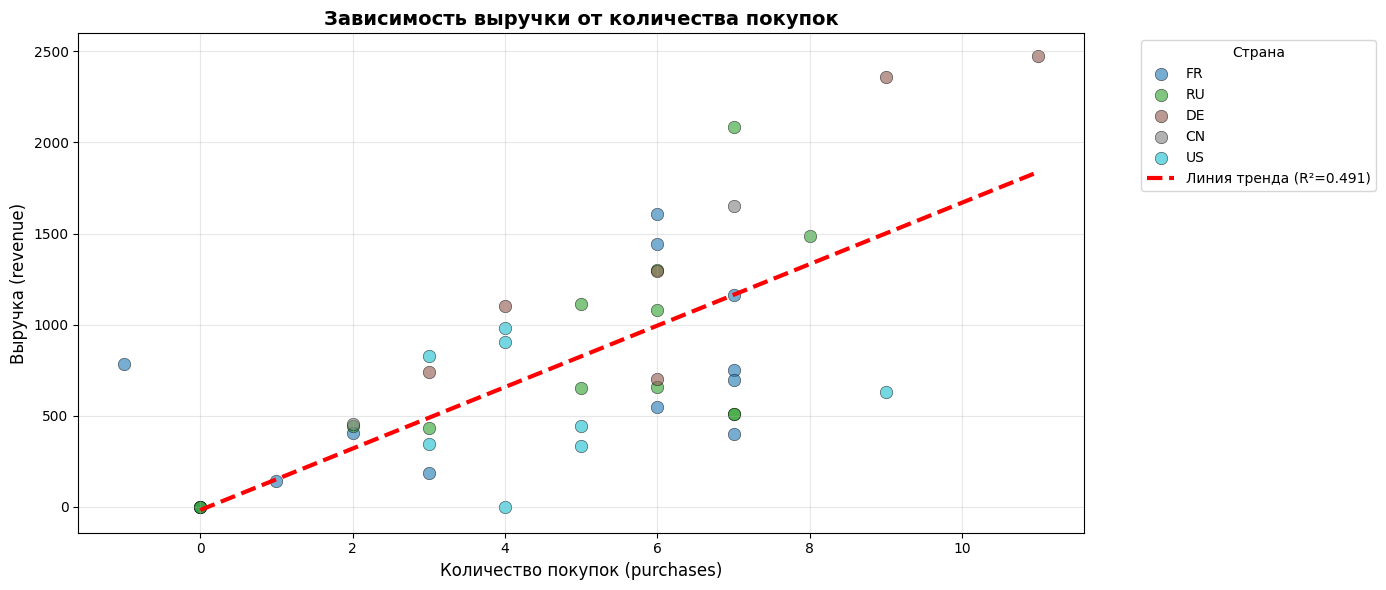

Что показано: Зависимость между количеством покупок и выручкой
Выводы: Положительная корреляция (чем больше покупок, тем выше выручка)
Видны кластеры по странам и некоторые аномалии (нулевая выручка при покупках)
Файл сохранен: figures/purchases_vs_revenue_scatter.png


In [474]:
print("3. ДИАГРАММА РАССЕЯНИЯ: ПОКУПКИ vs ВЫРУЧКА")
plt.figure(figsize=(14, 6))
# Scatter plot с разными цветами для стран
unique_countries = df['country'].dropna().unique()
cmap = plt.cm.get_cmap('tab10')
# Создаем scatter plot
scatter_plots = []
for i, country in enumerate(unique_countries):
    country_data = df[df['country'] == country]
    scatter = plt.scatter(country_data[purchase_col], country_data[revenue_col], 
                         color=cmap(i / max(len(unique_countries)-1, 1)), 
                         alpha=0.6, s=80, label=country, 
                         edgecolors='black', linewidth=0.5)
    scatter_plots.append(scatter)
plt.title('Зависимость выручки от количества покупок', fontsize=14, fontweight='bold')
plt.xlabel(f'Количество покупок ({purchase_col})', fontsize=12)
plt.ylabel(f'Выручка ({revenue_col})', fontsize=12)
plt.grid(True, alpha=0.3)
# Добавляем линию тренда (игнорируем выбросы)
clean_data = df[(df[purchase_col] >= 0) & (df[revenue_col] >= 0)]
if len(clean_data) > 1:
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        clean_data[purchase_col], clean_data[revenue_col])
    x_trend = np.array([clean_data[purchase_col].min(), clean_data[purchase_col].max()])
    y_trend = intercept + slope * x_trend
    plt.plot(x_trend, y_trend, color='red', linewidth=3, linestyle='--', 
             label=f'Линия тренда (R²={r_value**2:.3f})')
plt.legend(title='Страна', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(f'{figures_dir}purchases_vs_revenue_scatter.png', dpi=300, bbox_inches='tight')
plt.show()
print("Что показано: Зависимость между количеством покупок и выручкой")
print("Выводы: Положительная корреляция (чем больше покупок, тем выше выручка)")
print("Видны кластеры по странам и некоторые аномалии (нулевая выручка при покупках)")
print(f"Файл сохранен: {figures_dir}purchases_vs_revenue_scatter.png")

Проверка сохраненных файлов

In [475]:
print("ПРОВЕРКА СОХРАНЕННЫХ ГРАФИКОВ")
import glob
saved_files = glob.glob(f'{figures_dir}*.png')
if saved_files:
    print(f"Сохранено файлов: {len(saved_files)}")
    for file in saved_files:
        file_size = os.path.getsize(file) / 1024  # в КБ
        print(f"{os.path.basename(file)} ({file_size:.1f} КБ)")
else:
    print("Файлы не найдены. Проверьте путь сохранения.")

ПРОВЕРКА СОХРАНЕННЫХ ГРАФИКОВ
Сохранено файлов: 3
age_histograms.png (115.0 КБ)
purchases_vs_revenue_scatter.png (226.3 КБ)
revenue_boxplots.png (116.0 КБ)
